In [80]:
# EDA packages
import pandas as pd
import numpy as np
import missingno as no
import shap


# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
#  Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
# features needed
names = ["Num_of_Preg", "Glucose_Conc", "BP", "Skin_Thickness",
         "TwoHour_Insulin", "BMI", "DM_Pedigree", "Age", "Class"]
# Load the dataset
df = pd.read_csv('pima-indians-diabetes.csv', names=names)

In [32]:
df.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.shape

(768, 9)

In [34]:
# check for missing values
df.isna().sum()

Num_of_Preg        0
Glucose_Conc       0
BP                 0
Skin_Thickness     0
TwoHour_Insulin    0
BMI                0
DM_Pedigree        0
Age                0
Class              0
dtype: int64

In [35]:
# check the type of the datas
df.dtypes

Num_of_Preg          int64
Glucose_Conc         int64
BP                   int64
Skin_Thickness       int64
TwoHour_Insulin      int64
BMI                float64
DM_Pedigree        float64
Age                  int64
Class                int64
dtype: object

In [36]:
# check for occurence of class
df.groupby('Class').size()

Class
0    500
1    268
dtype: int64

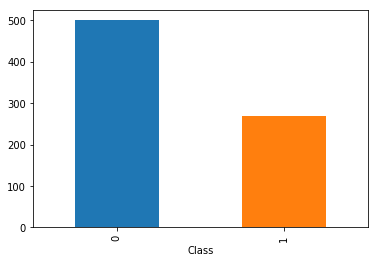

In [37]:
# plot the groups
df.groupby('Class').size().plot(kind="bar")

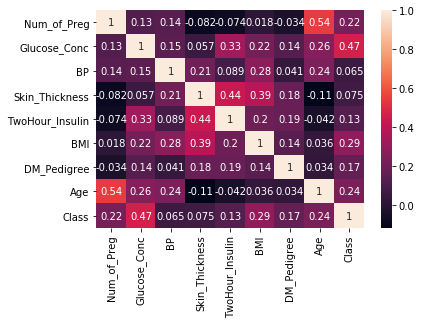

In [38]:
# check for correlation between input_data and labesl/outcomes
corr = df.corr()

# plot a heatmap
sns.heatmap(corr, annot=True)

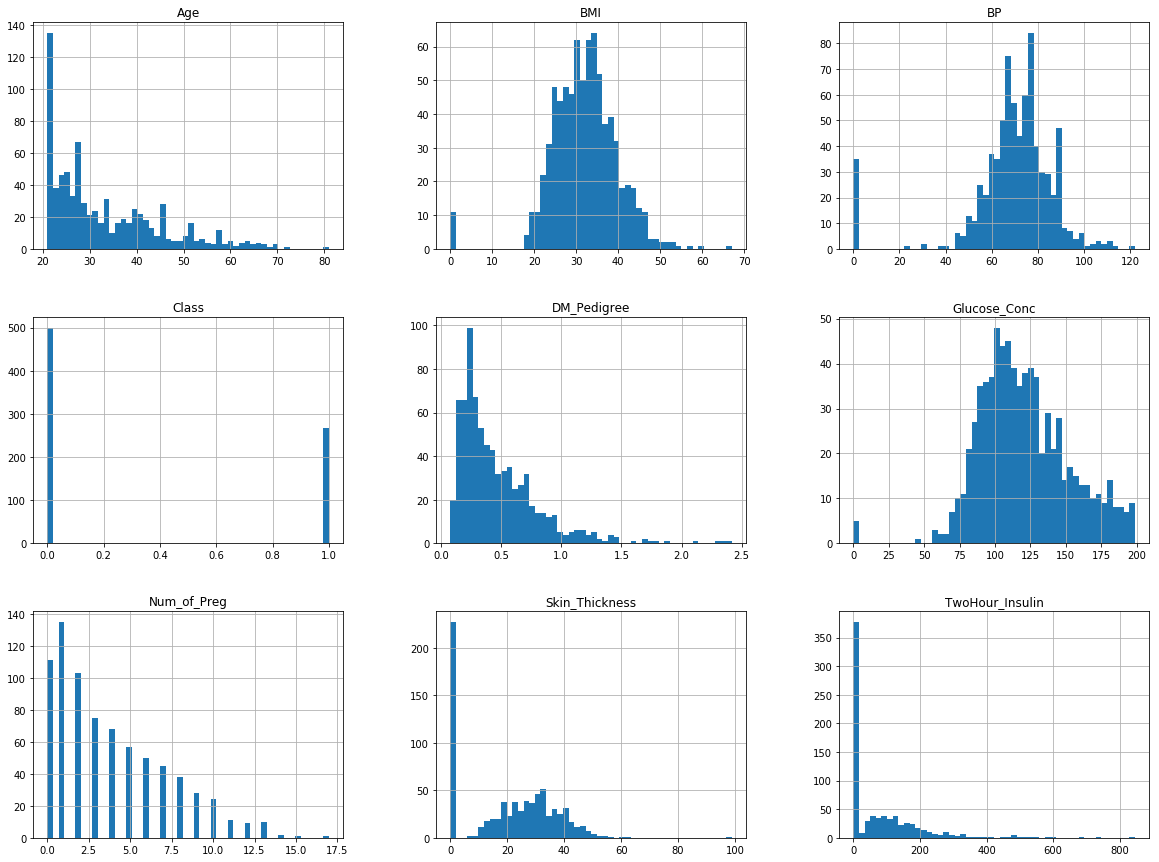

In [39]:
# Data viz for entire datasets
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [40]:
# Descriptive analysis Transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_of_Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose_Conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
TwoHour_Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DM_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [41]:
# Data cleaning
# Removing 0 sinces BP and can't be zero

In [42]:
# checking for minimum BP
df['BP'].min()

0

In [43]:
# Replace 0 with Median not Mean
df['BP'] = df['BP'].replace(to_replace=0, value=df['BP'].median())

In [44]:
# checking for minimum BP
df['BMI'].min()

0.0

In [45]:
# Recheck
df['BP'].min()

24

In [46]:
# Replace 0 with Median not Mean
df['BP'] = df['BP'].replace(to_replace=0, value=df['BP'].median())

In [47]:
# checking for minimum TwoHour Insulin
df['TwoHour_Insulin'].min()

0

In [48]:
# Replace 0 with Median not Mean
df['TwoHour_Insulin'] = df['TwoHour_Insulin'].fillna(
    df['TwoHour_Insulin'].median())

In [49]:
# checking for minimum Glucose
df['Glucose_Conc'].min()

0

In [50]:
# Replace 0 with Median not Mean
df['Glucose_Conc'] = df['Glucose_Conc'].replace(
    to_replace=0, value=df['Glucose_Conc'].median())

In [51]:
df['Skin_Thickness'] = df['Skin_Thickness'].fillna(
    df['Skin_Thickness'].median())

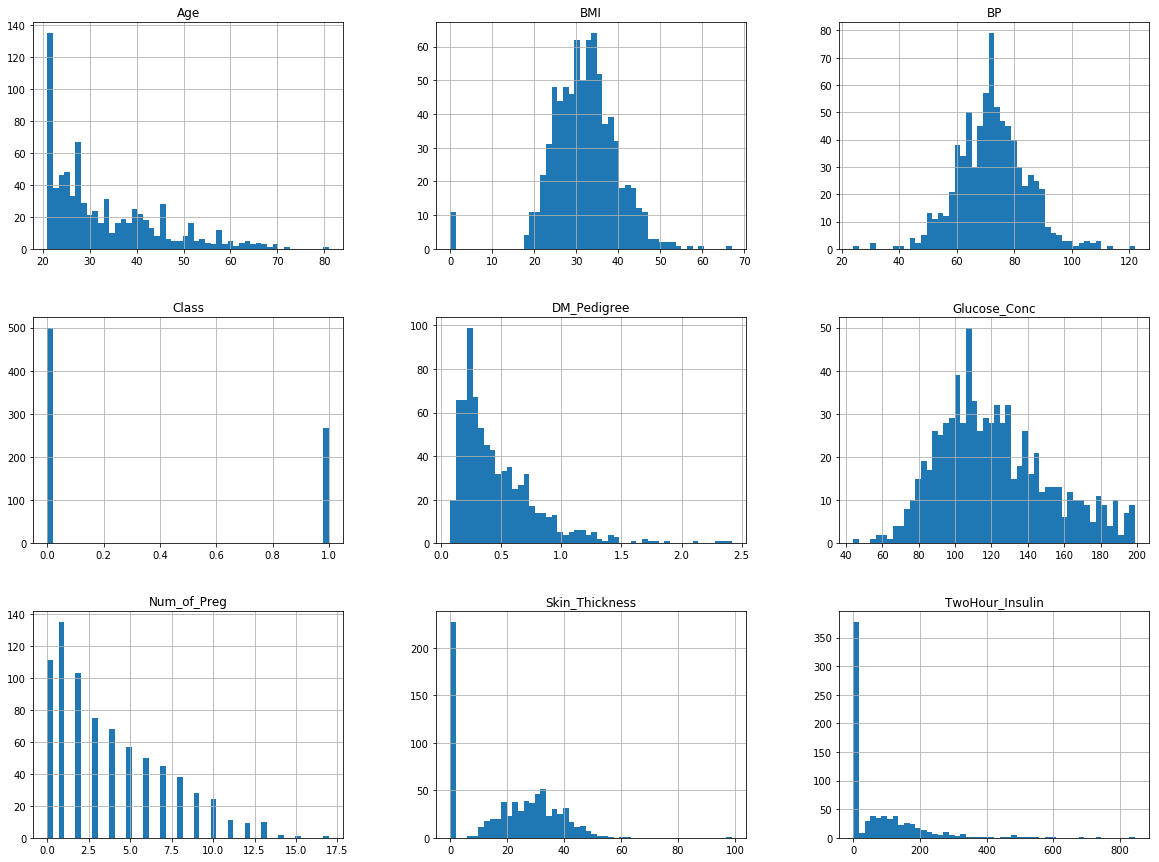

In [52]:
# plot hist of all data again
df.hist(bins=50, figsize=(20, 15))
plt.show()

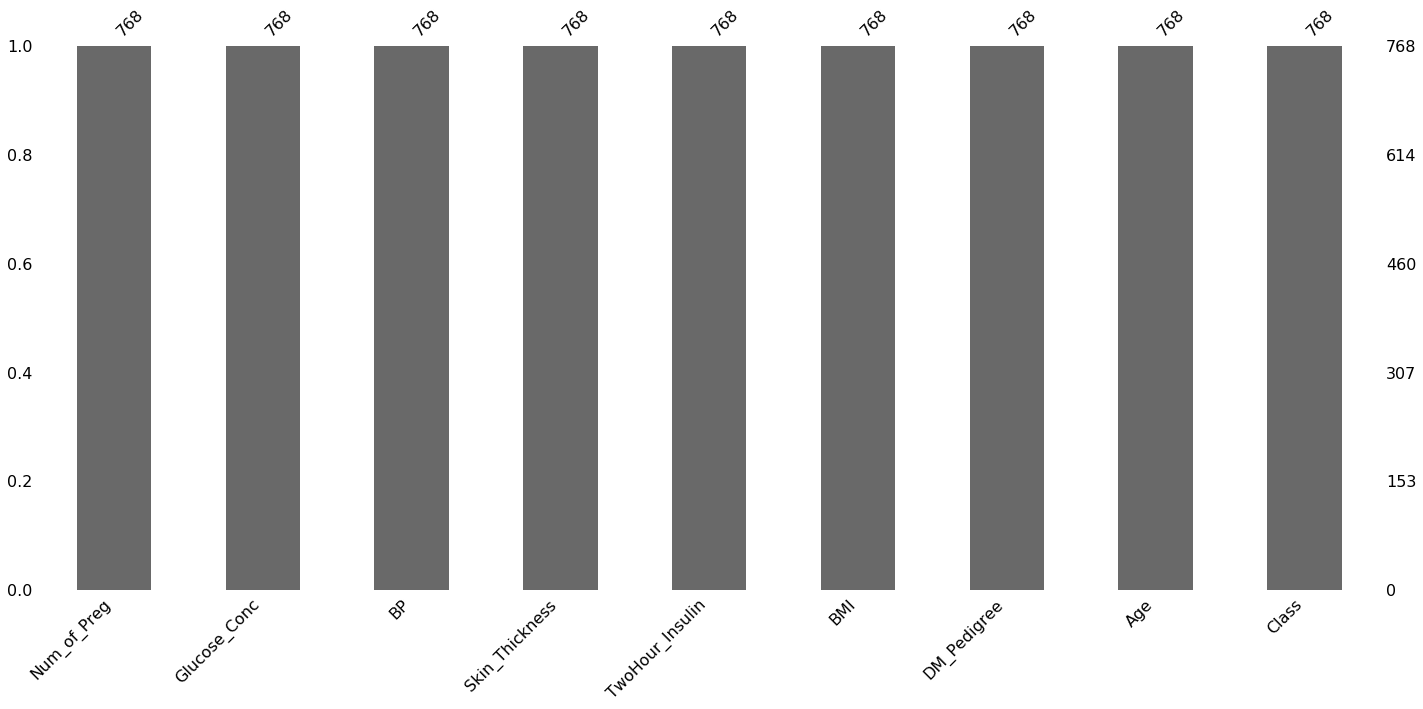

In [53]:
# checking for Null value or NO
no.bar(df)

In [54]:
# Feature Preparation
df.columns

Index(['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age', 'Class'],
      dtype='object')

In [55]:
# shaoe
df.shape

(768, 9)

In [58]:
# slicing
df.iloc[:, 0:8]

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,72,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [61]:
# separate the Input data
Xfeatures = df.iloc[:, 0:8]

In [62]:
# sepate the labels
Ylabel = df['Class']

In [64]:
# scale the dataset
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

In [65]:
# check the shape of scaled data
X.shape

(768, 8)

In [66]:
# features number
names[0:8]

['Num_of_Preg',
 'Glucose_Conc',
 'BP',
 'Skin_Thickness',
 'TwoHour_Insulin',
 'BMI',
 'DM_Pedigree',
 'Age']

In [67]:
# convert to dataframe
X = pd.DataFrame(X, columns=names[0:8])

In [68]:
# heads
X.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.642325,0.943638,0.200000


In [70]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, Ylabel, test_size=0.2, random_state=42)

In [71]:
# check the splited shape
X_train.shape

(614, 8)

In [72]:
# Building the Model with Logreg anf KNN
logreg = LogisticRegression()

In [73]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
# print the score
print("Accuracy Score of Logisitic::", logreg.score(X_test, y_test))

Accuracy Score of Logisitic:: 0.7922077922077922


In [75]:
# make prediction
X_test.values[0]

array([0.35294118, 0.3483871 , 0.34693878, 0.33333333, 0.22458629,
       0.50670641, 0.15029889, 0.36666667])

In [77]:
# Prediction on A Single Sample
logreg.predict(np.array(X_test.values[0]).reshape(1, -1))

array([0], dtype=int64)

In [83]:
# init Js for plot
shap.initjs()

In [84]:
explainer = shap.KernelExplainer(logreg.predict_proba, X_train)

shap_values = explainer.shap_values(X_test)

Using 614 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


HBox(children=(IntProgress(value=0, max=154), HTML(value='')))

C:\Users\taofe\Anaconda3\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
